In [1]:
import pandas as pd
df = pd.read_csv('database.csv')
df.head()

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


In [2]:
df[df.isnull().any(axis=1)]

,Name,StudyHours,Grade
22,Bill,8.0,NaN
23,Ted,NaN,NaN


In [3]:
# df.StudyHours = df.StudyHours.fillna(df.StudyHours.mean())
# df.Grade.fillna(df.Grade.mean())

# df = df.dropna(axis=0)
# df = df.dropna()

# If two conditions are there to be filled in a column
# df['Results'] = ['Passed' if x > 59 else 'Failed' for x in df['Grade']]

In [4]:
df = df.dropna()

In [5]:
def Results(frame):
    if frame['Grade'] > 59:
        val = 'Passed'
    elif frame['Grade'] > 39:
        val = 'Promoted'
    else:
        val = 'Failed'
    return val

In [6]:
df['Results'] = df.apply(Results,axis=1)

In [7]:
import matplotlib.pyplot as plt

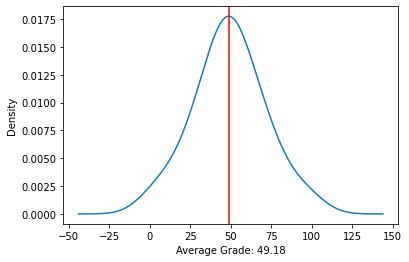

In [8]:
df.Grade.plot(kind='density')
plt.axvline(df.Grade.mean(),color='red')
plt.annotate('Average: '+str(round(df.Grade.mean(),2)),xy=(50,0.001),color='navy',weight='bold')
plt.xlabel('Average Grade: '+str(round(df.Grade.mean(),2)))
plt.show()

In [9]:
passed_count = df.Results[df.Results=='Passed'].count()
promoted_count = df.Results[df.Results=='Promoted'].count()
failed_count = df.Results[df.Results=='Failed'].count()

qualifer_ratio = round((passed_count+promoted_count)/df.Results.count()*100,2)

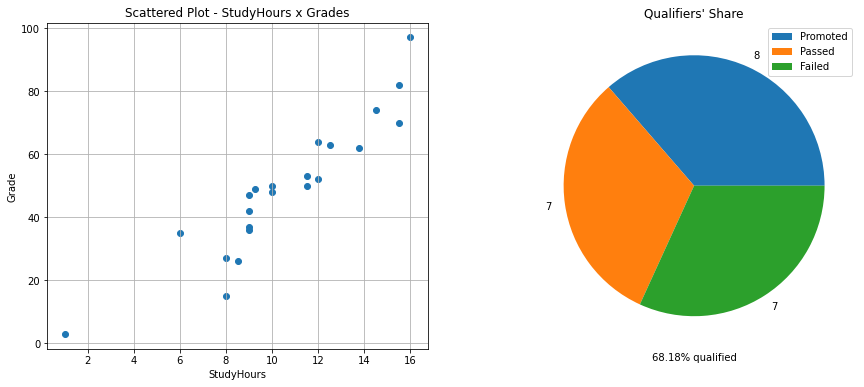

In [10]:
results_values = df.Results.value_counts()

fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].scatter(x=df.StudyHours,y=df.Grade)
ax[0].set_xlabel('StudyHours')
ax[0].set_ylabel('Grade')
ax[0].grid(True)
ax[0].set_title('Scattered Plot - StudyHours x Grades')

ax[1].pie(results_values,labels=results_values)
ax[1].legend(results_values.keys())
ax[1].set_xlabel(str(qualifer_ratio)+"% qualified")
ax[1].set_title("Qualifiers' Share")
plt.show()

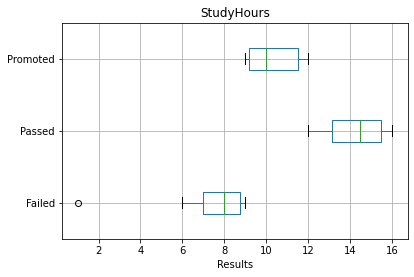

In [11]:
df.boxplot(column='StudyHours',by='Results',vert=False)
plt.suptitle("")
plt.show()

In [12]:
df = df[df.StudyHours>6]

In [13]:
df['StudyHours2'] = df.StudyHours

In [14]:
# df = df.reset_index()

In [15]:
# df = df.drop('index',axis=1)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
num_val = df[['StudyHours','StudyHours2']]

In [19]:
x, y = num_val, df.Grade

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.40)

In [21]:
model.fit(x_train, y_train)

LinearRegression()

In [22]:
predicted = model.predict(x_test)

In [23]:
from sklearn import metrics

In [24]:
metrics.r2_score(y_test,predicted)

0.5476673427991887

In [49]:
data1 = pd.DataFrame(columns=['StudyHours','Grade','Results'])

In [51]:
enquiry_1 = float(input("Please put StudyHours to predict Grades:"))
predict_1 = model.predict([[enquiry_1,enquiry_1]])
predict_1 = predict_1.round(2)
predict_1 = predict_1[0]

if predict_1 > 59:
    print("Grades will be: "+str(predict_1))
    result_text = "Passed"
    print(result_text)
elif predict_1 > 39:
    print("Grades will be: "+str(predict_1))
    result_text = "Promoted"
    print(result_text)
else:
    print("Grades will be: "+str(predict_1))
    result_text = "Failed"
    print(result_text)
    
temp_1 = {'StudyHours':(enquiry_1),'Grade':(predict_1),'Results':(result_text)}

data1 = data1.append(temp_1,ignore_index=True)

Please put StudyHours to predict Grades: 9


Grades will be: 43.0
Promoted


In [64]:
data1.to_csv('Realtime prediction.csv')